In [173]:
#Installing packages

!pip install jupyter
!pip install yfinance


In [174]:
#Importing packages

from matplotlib import dates
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import yfinance as yf

In [175]:
#Download Apple and SNP data from yfinance, assign to variable 'raw'

raw = yf.download('SPY AAPL', start = '2010-01-01', end = '2022-12-31')

[*********************100%%**********************]  2 of 2 completed


In [176]:
#Display data frame to get a general idea of dataset

raw

Price        Adj Close                   Close                    High  \
Ticker            AAPL         SPY        AAPL         SPY        AAPL   
Date                                                                     
2010-01-04    6.454505   86.580727    7.643214  113.330002    7.660714   
2010-01-05    6.465665   86.809944    7.656429  113.629997    7.699643   
2010-01-06    6.362821   86.871063    7.534643  113.709999    7.686786   
2010-01-07    6.351057   87.237762    7.520714  114.190002    7.571429   
2010-01-08    6.393281   87.528061    7.570714  114.570000    7.571429   
...                ...         ...         ...         ...         ...   
2022-12-23  130.631363  374.799957  131.860001  382.910004  132.419998   
2022-12-27  128.818420  373.321960  130.029999  381.399994  131.410004   
2022-12-28  124.865593  368.682373  126.040001  376.660004  131.029999   
2022-12-29  128.402344  375.318756  129.610001  383.440002  130.479996   
2022-12-30  128.719345  374.330200  129.929993  382.429993  129.949997   

Price                          Low                    Open              \
Ticker             SPY        AAPL         SPY        AAPL         SPY   
Date                                                                     
2010-01-04  113.389999    7.585000  111.510002    7.622500  112.370003   
2010-01-05  113.680000    7.616071  112.849998    7.664286  113.260002   
2010-01-06  113.989998    7.526786  113.430000    7.656429  113.519997   
2010-01-07  114.330002    7.466071  113.180000    7.562500  113.500000   
2010-01-08  114.620003    7.466429  113.660004    7.510714  113.889999   
...                ...         ...         ...         ...         ...   
2022-12-23  383.059998  129.639999  378.029999  130.919998  379.649994   
2022-12-27  383.149994  128.720001  379.649994  131.380005  382.790009   
2022-12-28  383.390015  125.870003  376.420013  129.669998  381.329987   
2022-12-29  384.350006  127.730003  379.079987  127.989998  379.630005   
2022-12-30  382.579987  127.430000  378.429993  128.410004  380.640015   

Price          Volume             
Ticker           AAPL        SPY  
Date                              
2010-01-04  493729600  118944600  
2010-01-05  601904800  111579900  
2010-01-06  552160000  116074400  
2010-01-07  477131200  131091100  
2010-01-08  447610800  126402800  
...               ...        ...  
2022-12-23   63814900   59857300  
2022-12-27   69007800   51638200  
2022-12-28   85438400   70911500  
2022-12-29   75703700   66970900  
2022-12-30   77034200   84022200  

[3272 rows x 12 columns]

In [177]:
#We want to simplify the dataframe suhc that only the Apple stock is shown without nested column headers
#Display just the column header data
    
raw.columns

MultiIndex([('Adj Close', 'AAPL'),
            ('Adj Close',  'SPY'),
            (    'Close', 'AAPL'),
            (    'Close',  'SPY'),
            (     'High', 'AAPL'),
            (     'High',  'SPY'),
            (      'Low', 'AAPL'),
            (      'Low',  'SPY'),
            (     'Open', 'AAPL'),
            (     'Open',  'SPY'),
            (   'Volume', 'AAPL'),
            (   'Volume',  'SPY')],
           names=['Price', 'Ticker'])

In [178]:
# Write a function that takes just the price headers, e.g. the 0th position of the column object
# .iloc used to select rows and columns based on index, this line uses selects every second column starting at the first index, isolating Apple
# .pipe allows us to insert a function as a command into a sequence of other function for brevity 

def fix_cols(df):
    columns = df.columns
    outer = [col[0] for col in columns]
    df.columns = outer
    return df

aapl = (raw
    .iloc[:, ::2]
    .pipe(fix_cols)
)

aapl

,Adj Close,Close,High,Low,Open,Volume
Date,,,,,,
2010-01-04,6.454505,7.643214,7.660714,7.585000,7.622500,493729600
2010-01-05,6.465665,7.656429,7.699643,7.616071,7.664286,601904800
2010-01-06,6.362821,7.534643,7.686786,7.526786,7.656429,552160000
2010-01-07,6.351057,7.520714,7.571429,7.466071,7.562500,477131200
2010-01-08,6.393281,7.570714,7.571429,7.466429,7.510714,447610800
...,...,...,...,...,...,...
2022-12-23,130.631363,131.860001,132.419998,129.639999,130.919998,63814900
2022-12-27,128.818420,130.029999,131.410004,128.720001,131.380005,69007800
2022-12-28,124.865593,126.040001,131.029999,125.870003,129.669998,85438400


<AxesSubplot:xlabel='Date'>

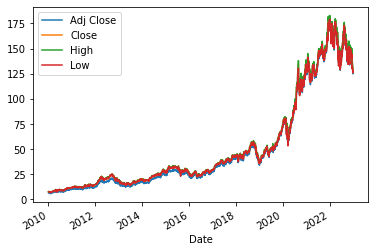

In [179]:
#Plot the key data in a line graph (exclude Volume and Open price)

(aapl
 .iloc[:, 0:-2:]
.plot()
)

<AxesSubplot:xlabel='Date'>

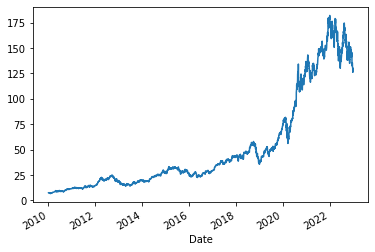

In [180]:
#Now just the Close price

(aapl
.Close
.plot()
)

<AxesSubplot:xlabel='Date'>

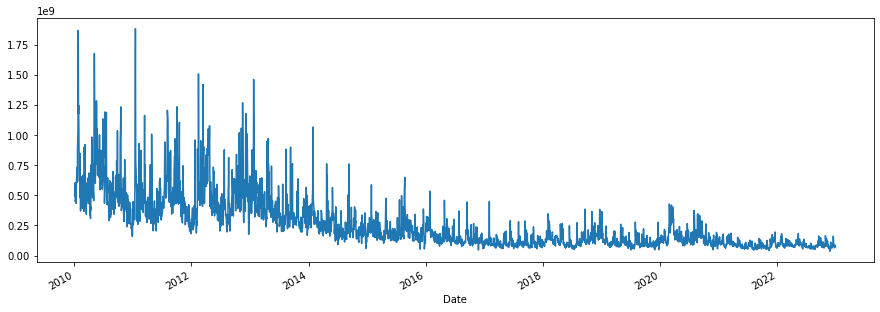

In [181]:
#Volume plot with customised dimensions

(aapl
.Volume
.plot(figsize = (15,5))
)

<AxesSubplot:xlabel='Date'>

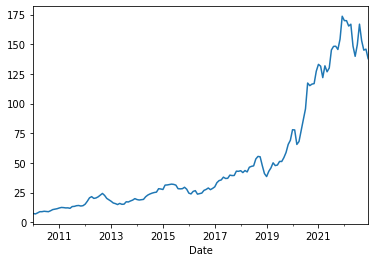

In [182]:
#Data is resampled to be the mean monthly price, aggregation fucntion is specified with .mean()

(aapl
 .resample('M')
 .Close
 .mean()
 .plot()
)

,Open,High,Low,Close
Date,,,,
2010-01-31,7.622500,7.699643,6.794643,6.859286
2010-02-28,6.870357,7.327500,6.816071,7.307857
2010-03-31,7.348214,8.481429,7.337500,8.392857
2010-04-30,8.478929,9.730714,8.312500,9.324643
2010-05-31,9.422857,9.567143,7.116071,9.174286
2010-06-30,9.274643,9.964643,8.650000,8.983214
2010-07-31,9.082143,9.499643,8.557143,9.187500
2010-08-31,9.301429,9.438571,8.412857,8.682143
2010-09-30,8.838214,10.526071,8.795714,10.133929


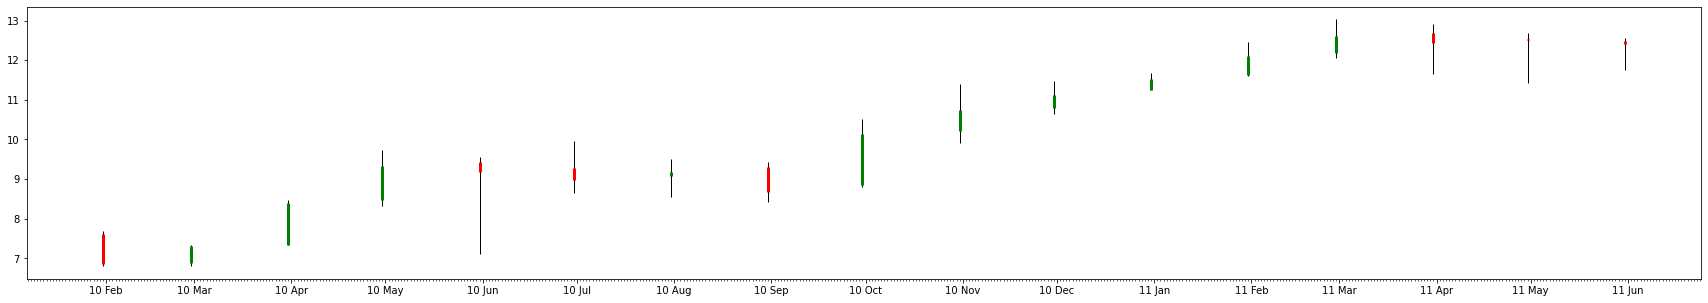

In [183]:
#Write a function to make a candlestick plot, inputs are the df and axes object
#.vlines is vertical, x location is the index of the variable, the top and bottom of the candlestick are the high and low values for that month in black
#if the opne value is bigger than close, vertical lines will be plotted in red 
#In green if they have gone up (limits are dictated by opne and close , not high and low
#Format x axis labels
#Aggregate each column in a different way, pandas needs to know how to choose whihc value in the month to use

fig, ax = plt.subplots(figsize=(30, 5))
def plot_candle(df, ax):
    
    ax.vlines(x=df.index, ymin=df.Low, ymax=df.High, colors='k', linewidth=1)
    
    red = df.query('Open > Close')
    ax.vlines(x=red.index, ymin=red.Close, ymax=red.Open, colors='r', linewidth=3)
    
    green=df.query('Open <= Close')
    ax.vlines(x=green.index, ymin=green.Close, ymax=green.Open, colors='g', linewidth=3)
    
    ax.xaxis.set_major_locator(dates.MonthLocator())
    ax.xaxis.set_major_formatter(dates.DateFormatter('%y %b'))
    ax.xaxis.set_minor_locator(dates.DayLocator())
    return df

(aapl
.resample('M')
.agg({'Open': 'first', 'High': 'max', 'Low': 'min', 'Close': 'last'})
.loc['Jan 2010':'May 2011']
.pipe(plot_candle, ax)
 )

,Open,High,Low,Close
Date,,,,
2019-09-01,NaN,NaN,NaN,NaN
2019-09-02,NaN,NaN,NaN,NaN
2019-09-03,51.607498,51.744999,51.055000,51.424999
2019-09-04,52.097500,52.369999,51.830002,52.297501
2019-09-05,53.000000,53.492500,52.877499,53.320000
...,...,...,...,...
2019-12-27,72.779999,73.492500,72.029999,72.449997
2019-12-28,NaN,NaN,NaN,NaN
2019-12-29,NaN,NaN,NaN,NaN


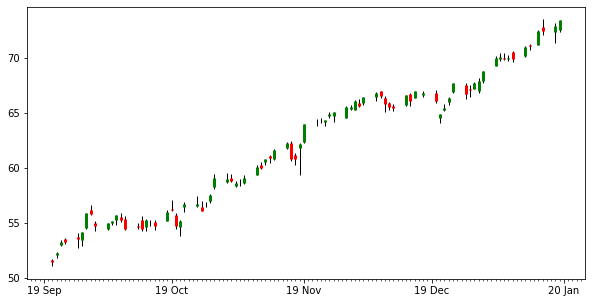

In [184]:
#Resample by day and take the average daily value between Sep and Dec

fig, ax = plt.subplots(figsize=(10, 5))

(aapl
.resample('d')
.agg({'Open': 'first', 'High': 'max', 'Low': 'min', 'Close': 'last'})
.loc['Sep 2019':'Dec 2019']
.pipe(plot_candle, ax)
 )

In [185]:
#Want to work with just 2009 to 2019

aapl = (aapl
        .loc['2009':'2019'])

aapl

,Adj Close,Close,High,Low,Open,Volume
Date,,,,,,
2010-01-04,6.454505,7.643214,7.660714,7.585000,7.622500,493729600
2010-01-05,6.465665,7.656429,7.699643,7.616071,7.664286,601904800
2010-01-06,6.362821,7.534643,7.686786,7.526786,7.656429,552160000
2010-01-07,6.351057,7.520714,7.571429,7.466071,7.562500,477131200
2010-01-08,6.393281,7.570714,7.571429,7.466429,7.510714,447610800
...,...,...,...,...,...,...
2019-12-24,68.974495,71.067497,71.222504,70.730003,71.172501,48478800
2019-12-26,70.342972,72.477501,72.495003,71.175003,71.205002,93121200
2019-12-27,70.316292,72.449997,73.492500,72.029999,72.779999,146266000


In [186]:
#Percent change

aapl.pct_change()

,Adj Close,Close,High,Low,Open,Volume
Date,,,,,,
2010-01-04,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-05,0.001729,0.001729,0.005082,0.004096,0.005482,0.219098
2010-01-06,-0.015906,-0.015906,-0.001670,-0.011723,-0.001025,-0.082646
2010-01-07,-0.001849,-0.001849,-0.015007,-0.008066,-0.012268,-0.135882
2010-01-08,0.006648,0.006648,0.000000,0.000048,-0.006848,-0.061871
...,...,...,...,...,...,...
2019-12-24,0.000951,0.000951,0.002252,0.009095,0.014829,-0.508189
2019-12-26,0.019840,0.019840,0.017867,0.006292,0.000457,0.920864
2019-12-27,-0.000379,-0.000379,0.013760,0.012013,0.022119,0.570706


<AxesSubplot:xlabel='Date'>

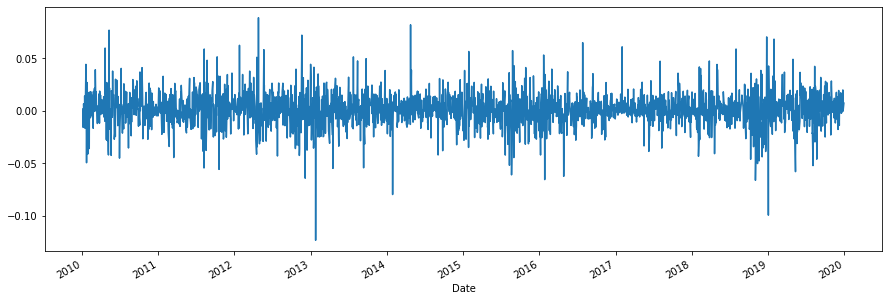

In [187]:
#Close price percentage change line graph

(aapl
.pct_change()
.Close
.plot(figsize=(15,5))
)

<AxesSubplot:>

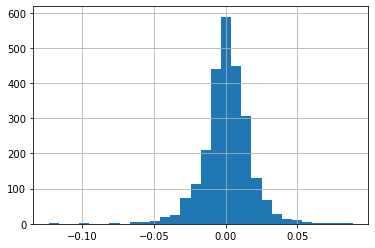

In [188]:
#Historgram
#Defaults to 10 bins unless otheriwse stated

(aapl
 .pct_change()
 .Close
 .hist(bins=(30))
)

Date
2019-08-09   -0.011994
2019-08-12   -0.002537
2019-08-13    0.042348
2019-08-14   -0.029765
2019-08-15   -0.004981
                ...   
2019-12-24    0.000951
2019-12-26    0.019840
2019-12-27   -0.000379
2019-12-30    0.005935
2019-12-31    0.007307
Name: Close, Length: 100, dtype: float64

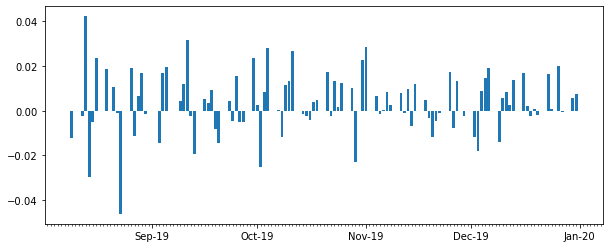

In [189]:
#Need to write a function to organise the dates because pandas messes them up if you use .bar()
#Close price for last 100 rows

def my_bar(ser, ax):
    ax.bar(ser.index, ser)
    ax.xaxis.set_major_locator(dates.MonthLocator())
    ax.xaxis.set_major_formatter(dates.DateFormatter('%b-%y'))
    ax.xaxis.set_minor_locator(dates.DayLocator())
    return ser

fig, ax = plt.subplots(figsize=(10,4)) 
(aapl
    .pct_change()
    .Close
    .iloc[-100:]
    .pipe(my_bar, ax)
)

In [190]:
# cum returns = (current price - 0th price) / 0 th price

def cum_returns(df, col):
    ser=df[col]
    return (ser
            .sub(ser[0])
            .div(ser[0])
            )

<AxesSubplot:xlabel='Date'>

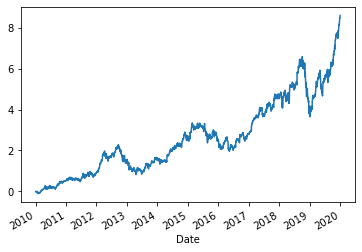

In [191]:
#cumulative returns plot

(aapl
 .pipe(cum_returns, 'Close')
 .plot()
 )

In [192]:
#Can use a lambda fucntion to create a new cum returns column

(aapl
 .assign(Cumulative= lambda df: cum_returns(df, 'Close'))
)

,Adj Close,Close,High,Low,Open,Volume,Cumulative
Date,,,,,,,
2010-01-04,6.454505,7.643214,7.660714,7.585000,7.622500,493729600,0.000000
2010-01-05,6.465665,7.656429,7.699643,7.616071,7.664286,601904800,0.001729
2010-01-06,6.362821,7.534643,7.686786,7.526786,7.656429,552160000,-0.014205
2010-01-07,6.351057,7.520714,7.571429,7.466071,7.562500,477131200,-0.016027
2010-01-08,6.393281,7.570714,7.571429,7.466429,7.510714,447610800,-0.009486
...,...,...,...,...,...,...,...
2019-12-24,68.974495,71.067497,71.222504,70.730003,71.172501,48478800,8.298117
2019-12-26,70.342972,72.477501,72.495003,71.175003,71.205002,93121200,8.482594
2019-12-27,70.316292,72.449997,73.492500,72.029999,72.779999,146266000,8.478996


Date
2019-08-09    5.574132
2019-08-12    5.557450
2019-08-13    5.835148
2019-08-14    5.631700
2019-08-15    5.598664
                ...   
2019-12-24    8.298117
2019-12-26    8.482594
2019-12-27    8.478996
2019-12-30    8.535255
2019-12-31    8.604925
Name: Close, Length: 100, dtype: float64

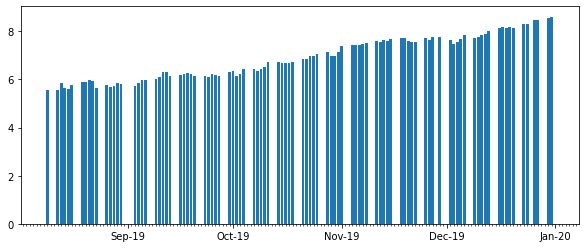

In [193]:
#Bar plot of the cumulative returns 

(aapl
 .assign(Cumulative= lambda df: cum_returns(df, 'Close'))
)

fig, ax = plt.subplots(figsize=(10,4)) 
(aapl
    .pipe(cum_returns, 'Close')
    .iloc[-100:]
    .pipe(my_bar, ax)
)

In [194]:
#Lets make a percent change column and title it properly
(aapl
 .assign(Change=aapl.Close.pct_change())
 .rename(columns={'Change':'Percent Change'})
)

,Adj Close,Close,High,Low,Open,Volume,Percent Change
Date,,,,,,,
2010-01-04,6.454505,7.643214,7.660714,7.585000,7.622500,493729600,NaN
2010-01-05,6.465665,7.656429,7.699643,7.616071,7.664286,601904800,0.001729
2010-01-06,6.362821,7.534643,7.686786,7.526786,7.656429,552160000,-0.015906
2010-01-07,6.351057,7.520714,7.571429,7.466071,7.562500,477131200,-0.001849
2010-01-08,6.393281,7.570714,7.571429,7.466429,7.510714,447610800,0.006648
...,...,...,...,...,...,...,...
2019-12-24,68.974495,71.067497,71.222504,70.730003,71.172501,48478800,0.000951
2019-12-26,70.342972,72.477501,72.495003,71.175003,71.205002,93121200,0.019840
2019-12-27,70.316292,72.449997,73.492500,72.029999,72.779999,146266000,-0.000379


array([<AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>],
      dtype=object)

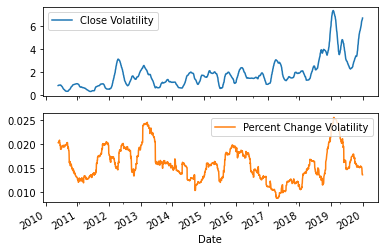

In [195]:
#Can also take a rolling std of some amount of values
#Take from the fifth value onwards
#can plot these on seperate graphs when subplots = True

(aapl
 .assign(CloseStd=aapl.Close.rolling(100).std())
 .rename(columns = {'CloseStd' : 'Close Volatility'})
 .assign(PerStd = aapl.Close.pct_change().rolling(100).std())
 .rename(columns = {'PerStd' : 'Percent Change Volatility'})
 .iloc[5:]
 .iloc[:, -2:]
 .plot(subplots=True)
 )


<AxesSubplot:xlabel='Date'>

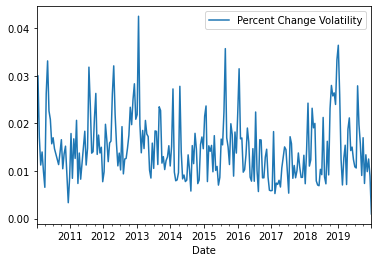

In [196]:
#We can do volatility with less frequent data (one every 15 days)
#We need to give pandas an aggregator to group the data with std()

(aapl
 .assign(Close_per_change = aapl.Close.pct_change())
    .resample('15D')
    .std()
    .rename(columns = {'Close_per_change' : 'Percent Change Volatility'})
    .iloc[:, -1:]
    .plot()
)


<AxesSubplot:xlabel='Date'>

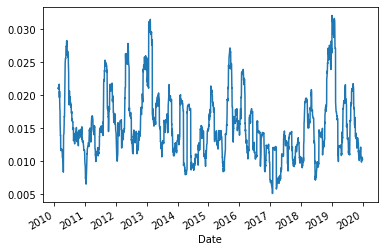

In [197]:
#30 day rolling voatility challenge

(aapl
    .assign(pct_change = aapl.Close.pct_change())
    .rolling(30, min_periods=30)
    .pct_change
    .std()
    .plot()
)

<AxesSubplot:xlabel='Date'>

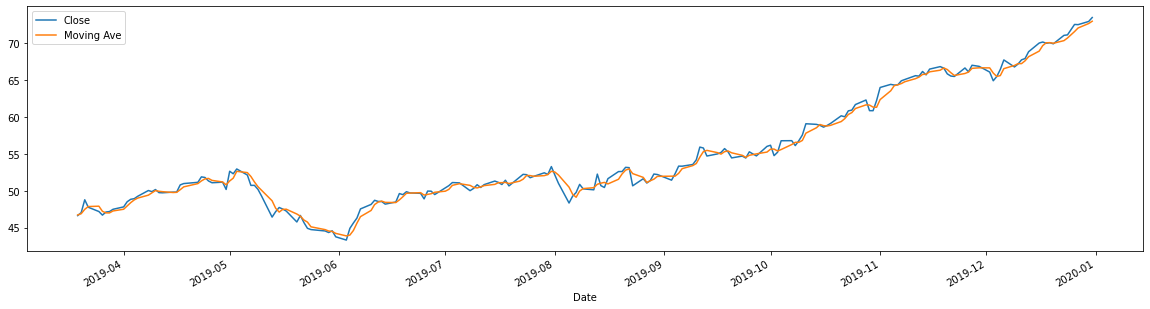

In [198]:
# We can use the function .shift(1) to recraete a column shifted one index down 
#There is also a built in method using rolling mean but it doesnt give us values for the first two rows because the set is in incomplete in the window

(aapl
 .assign(s1 = aapl.Close.shift(1),
         s2 = aapl.Close.shift(2),
         mov_ave = lambda df : df.loc[:,['Close', 's1', 's2']].mean(axis='columns'),)
.rename(columns = {'mov_ave' : "Moving Ave"})
.drop(columns=['s1','s2'])
.loc[:, ['Close', 'Moving Ave']]
.iloc[-200:,]
.plot(figsize=(20,5))
)

<AxesSubplot:xlabel='Date'>

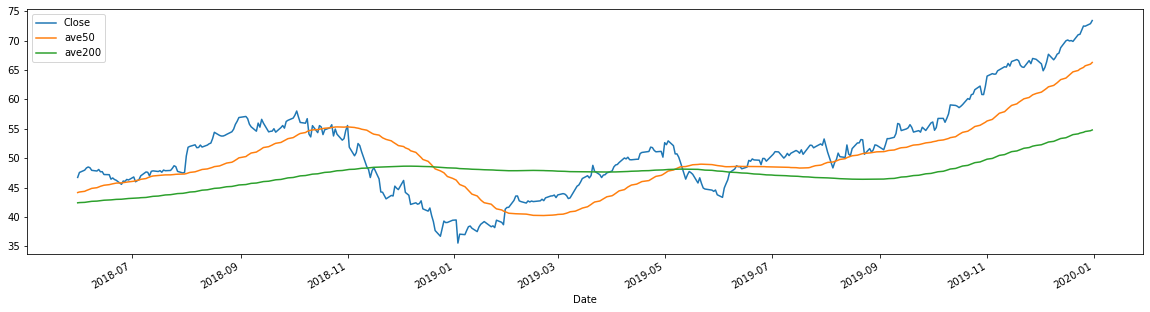

In [199]:
#The golden Cross - fifty day moving average and 200 day over close price

(aapl
 .assign(ave50 = aapl.Close.rolling(50).mean(),
        ave200 = aapl.Close.rolling(200).mean()
        )
    .loc[:, ['Close', 'ave50', 'ave200']]
    .iloc[-400:]
    .plot(figsize=(20,5))
)

<AxesSubplot:xlabel='Date'>

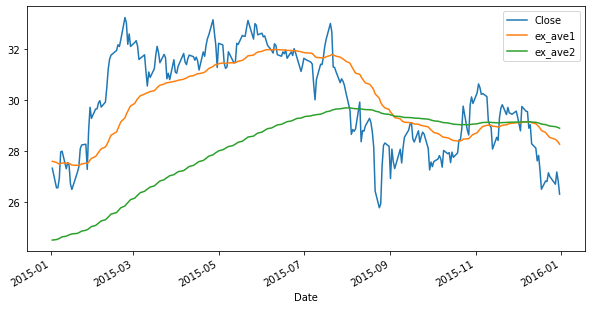

In [200]:
#Now lets try with the exponential weighted moving average - must also be aggregated 

(aapl
.assign(ex_ave1 = aapl.Close.ewm(alpha = .0392).mean(),
        ex_ave2 = aapl.Close.ewm(alpha = .0095).mean()
        )
.loc[:, ['Close', 'ex_ave1', 'ex_ave2']]
.loc['2015' : '2015',]
.plot(figsize= (10,5))
)

C:\Users\matya\AppData\Local\Temp\ipykernel_31096\732421960.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.OBV[i] = cum_obv
C:\Users\matya\AppData\Local\Temp\ipykernel_31096\732421960.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.OBV[i] = cum_obv
C:\Users\matya\AppData\Local\Temp\ipykernel_31096\732421960.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.OBV[i] = cum_obv


<AxesSubplot:xlabel='Date'>

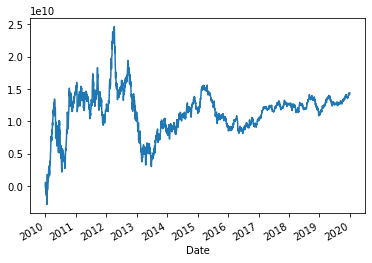

In [201]:
#OBV is an indicator of momentum using volume OBV = OBV_prev + {volume if close > close_prev, 0 if close = close_prev , -volume if close < close_prev}
# #whre obv is the current on on balance volume and volume is the latest trading volume 
#this code takes 30 seconds to execute 

def calc_obv(df):
    
    cum_obv = 0
    df = df.copy()
    df["OBV"] = 0.0

    for i in range(1, len(df)):
        
        if df.Close[i] > df.Close[i - 1]:
            cum_obv = cum_obv + df.Volume[i]
            df.OBV[i] = cum_obv

        elif df.Close[i] < df.Close[i - 1]:
            cum_obv = cum_obv - df.Volume[i]
            df.OBV[i] = cum_obv

        else:
            cum_obv = cum_obv
            df.OBV[i] = cum_obv 
    
    return df

(aapl
 .pipe(calc_obv)
 .OBV
 .plot()
)


<AxesSubplot:xlabel='Date'>

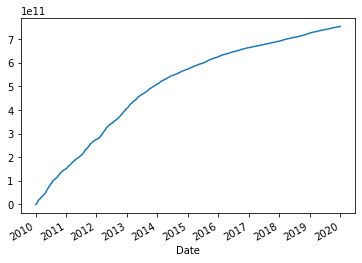

In [206]:
# This is painful
(aapl
    .assign(close_prev=aapl.Close.shift(1),
            vol=0,
            obv=lambda adf: adf.vol.where(cond=adf.Close == adf.close_prev,
                                          other=adf.Volume.where(cond=adf.Close > adf.close_prev,
                                                                other=adf.Volume.where(cond=adf.Close < adf.close_prev, other=0)
                                                               )
                                         ).cumsum()
           )
    .obv
    .plot()
)